In [10]:
import pandas as pd
import numpy as np
import haversine as hs
import matplotlib.pyplot as plt

In [6]:
df_gpx = pd.read_csv("tabela_final_lsmision_35km.csv", sep = ';', index_col='Unnamed: 0')

In [7]:
df_gpx.head()

,latitude,longitude,elevacao,diff_elev,distancias,soma_elev,soma_dist,km_group,desnivel_positivo,desnivel_negativo
0,-22.390577,-44.966613,926.514286,0.000000,0.00,0.000000,0.00,0,0.0,0.000000
1,-22.390573,-44.966640,926.400000,-0.114286,2.81,-0.114286,2.81,1,0.0,-0.114286
2,-22.390573,-44.966668,926.400000,0.000000,2.88,-0.114286,5.69,1,0.0,0.000000
3,-22.390568,-44.966689,926.200000,-0.200000,2.23,-0.314286,7.92,1,0.0,-0.200000
4,-22.390742,-44.966651,926.000000,-0.200000,19.74,-0.514286,27.66,1,0.0,-0.200000


In [8]:
df_gpx.km_group.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

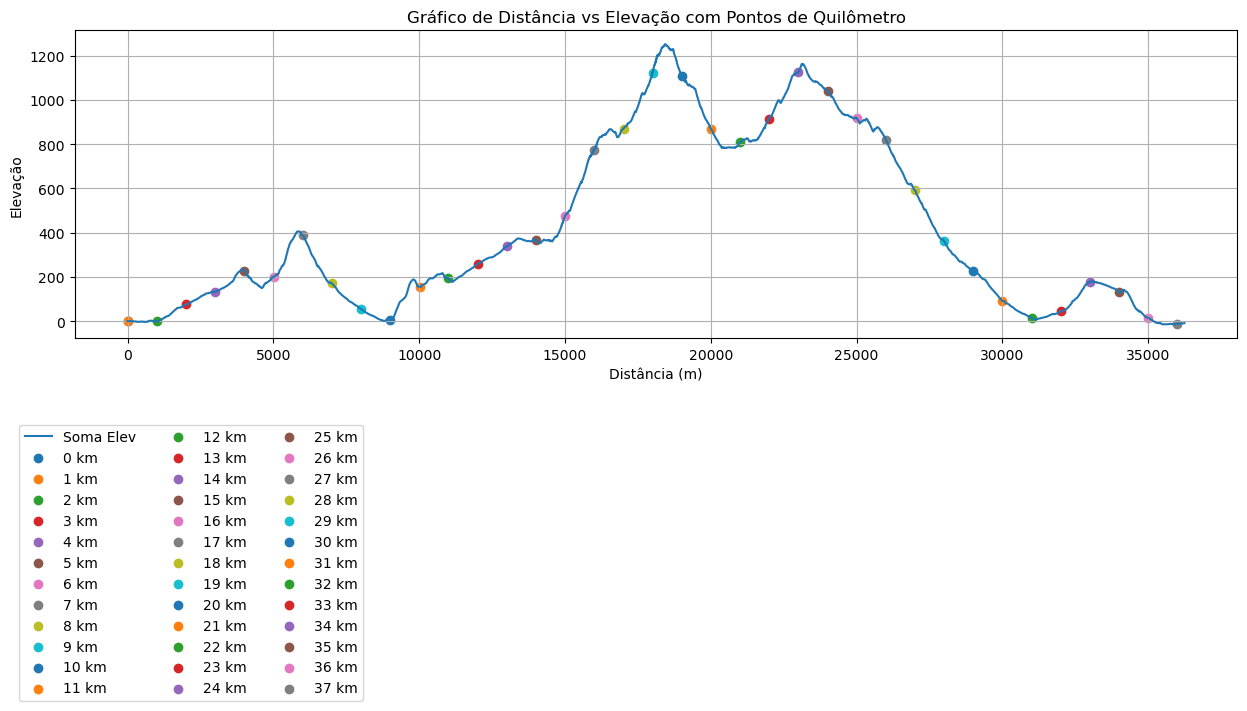

In [19]:
plt.figure(figsize=(15, 4))
plt.plot(df_gpx['soma_dist'], df_gpx['soma_elev'], label='Soma Elev')

# Adicionando os pontos para cada quilômetro
km_points = df_gpx[df_gpx['km_group'].notnull()]  # Filtra apenas as linhas que têm 'km_group'
for km in km_points['km_group'].unique():
    km_dist = km_points[km_points['km_group'] == km]['soma_dist'].values[0]
    km_elev = km_points[km_points['km_group'] == km]['soma_elev'].values[0]
    plt.scatter(km_dist, km_elev, label=f'{km} km')

# Adicionando legendas e título
plt.xlabel('Distância (m)')
plt.ylabel('Elevação')
plt.title('Gráfico de Distância vs Elevação com Pontos de Quilômetro')
plt.legend(loc='lower center', bbox_to_anchor=(0.1, -1.2), ncol=3)  # Ajusta a posição da legenda
plt.grid(True)

# Exibindo o gráfico
plt.show()

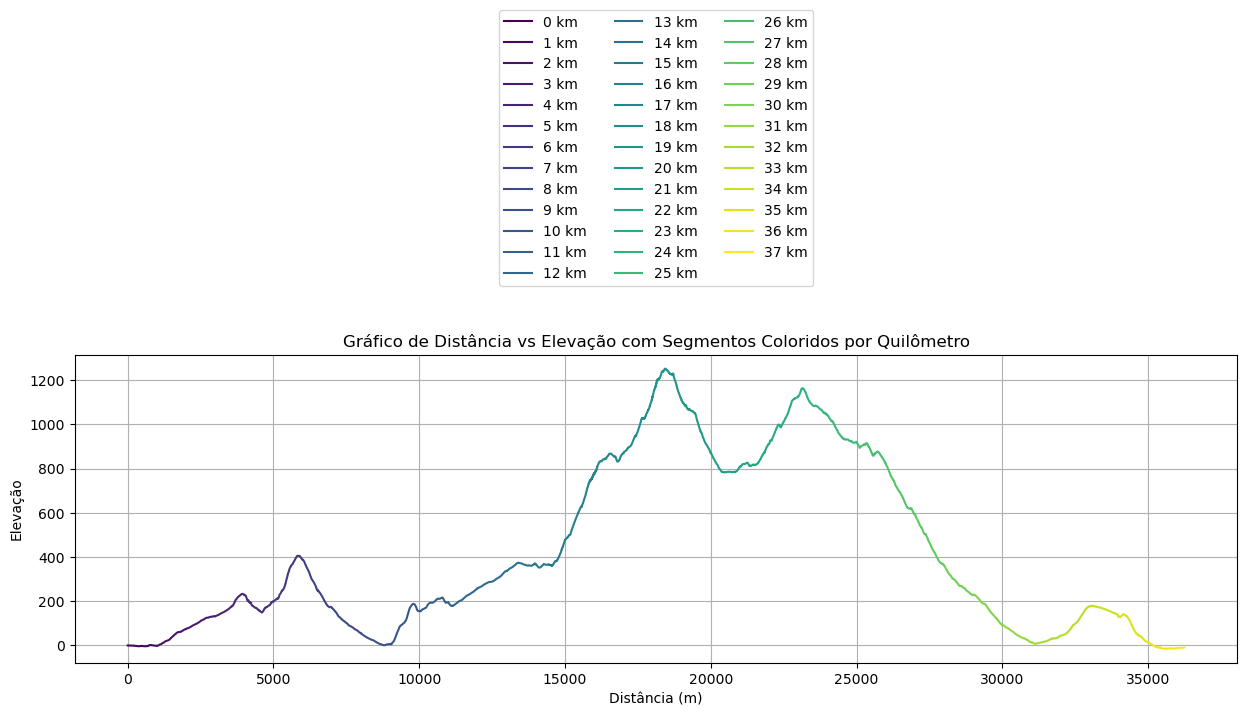

In [21]:
# Ordena os dados pela distância para garantir que os segmentos sejam contínuos
df_final_sorted = df_gpx.sort_values(by='soma_dist')

# Plotando o gráfico
plt.figure(figsize=(15, 4))

# Obtendo os grupos únicos de quilômetro
km_groups = df_final_sorted['km_group'].unique()

# Definindo um colormap para os grupos
cmap = plt.get_cmap('viridis', len(km_groups))

# Plotando cada segmento com uma cor diferente
for i, km in enumerate(km_groups):
    # Seleciona os dados para o grupo atual
    segment = df_final_sorted[df_final_sorted['km_group'] == km]
    
    # Plota o segmento
    plt.plot(segment['soma_dist'], segment['soma_elev'], color=cmap(i), label=f'{km} km')

# Adicionando legendas e título
plt.xlabel('Distância (m)')
plt.ylabel('Elevação')
plt.title('Gráfico de Distância vs Elevação com Segmentos Coloridos por Quilômetro')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.2), ncol=3)  # Ajusta a posição da legenda
plt.grid(True)

# Exibindo o gráfico
plt.show()
